# Plots to analyse the VEGAS Algorithm for the Variational Method applied to the Helium atom
Note that all raw data is in the GitHub repository!

In [22]:
import numpy as np
import matplotlib.pyplot as plt


'#E24A33'

### Here we analyse how VEGAS performs with increasing number of iterations, in terms of the energy it gives and the variational parameter

In [3]:
#import and unpack data
iters, energy, alpha, estd,astd = np.loadtxt('vegas_1param_iter_processed.csv', delimiter=',', skiprows=1, unpack=1)
iters, twop_energy, twop_estd = np.loadtxt('vegas_2param_iter_processed.csv', delimiter=',', skiprows=1, unpack=1)


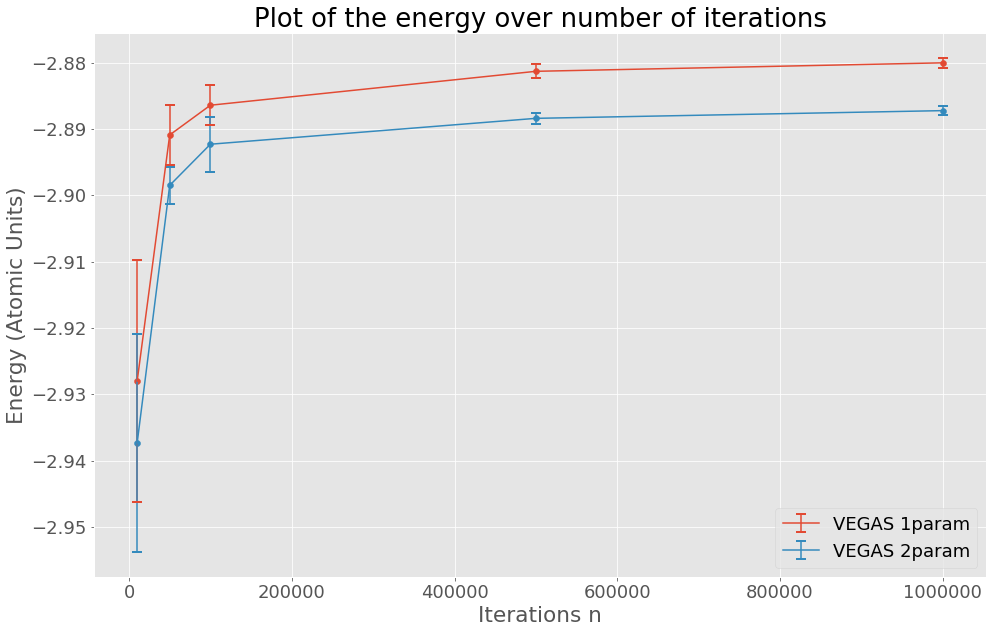

In [26]:
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(16,10))

mew = 2
cs = 5


def get_color(indx):
    return list(plt.rcParams['axes.prop_cycle'])[indx]['color']

plt.xlabel('Iterations n')
plt.ylabel('Energy (Atomic Units)')
color = get_color(0)
plt.errorbar(iters,energy, yerr = estd, mew = mew, capsize=cs, label='VEGAS 1param', color = color)
plt.scatter(iters,energy)
color = get_color(1)
plt.errorbar(iters,twop_energy, yerr = twop_estd, mew = mew, capsize=cs, label='VEGAS 2param', color=color)
plt.scatter(iters,twop_energy)
plt.legend()

plt.title('Plot of the energy over number of iterations')
plt.savefig('vegas_energy_comp')
plt.show()



Text(0.5, 1.0, 'Plot of the variational parameter over number of iterations')

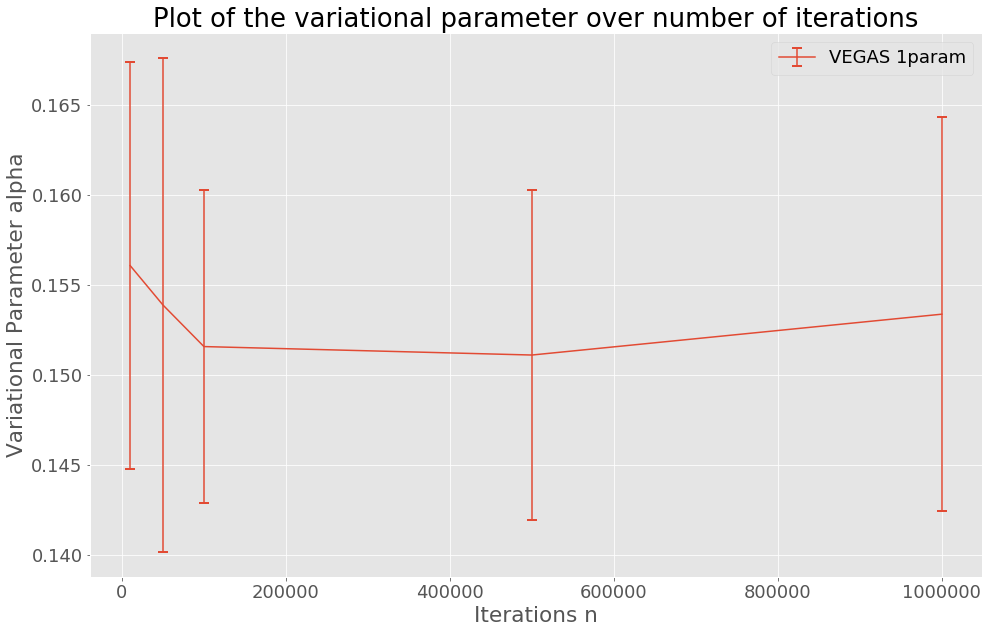

In [4]:
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(16,10))

mew = 2
cs = 5
plt.xlabel('Iterations n')
plt.ylabel('Variational Parameter alpha')
plt.errorbar(iters, alpha, yerr = astd, mew =mew, capsize=cs, label='VEGAS 1param')
plt.legend()

plt.title('Plot of the variational parameter over number of iterations')
#plt.savefig('1param_alpha_comp')
plt.show()

### Here we test how the Q value changes for varying number of iterations
#### This was done for N=1e5, 1para, each averaged over 50 trials
The smaller the Q value, the less likely that the integral results are distributed as a Gaussian, which suggests that the number of iterations are insufficient to give a good answer. The variance of the Q value is much greater as N decreases.

In [11]:
iters, qexp, qnorm, qestd, qnstd = np.loadtxt('vegas_q_comparison.csv', delimiter=',', skiprows=1, unpack=1)

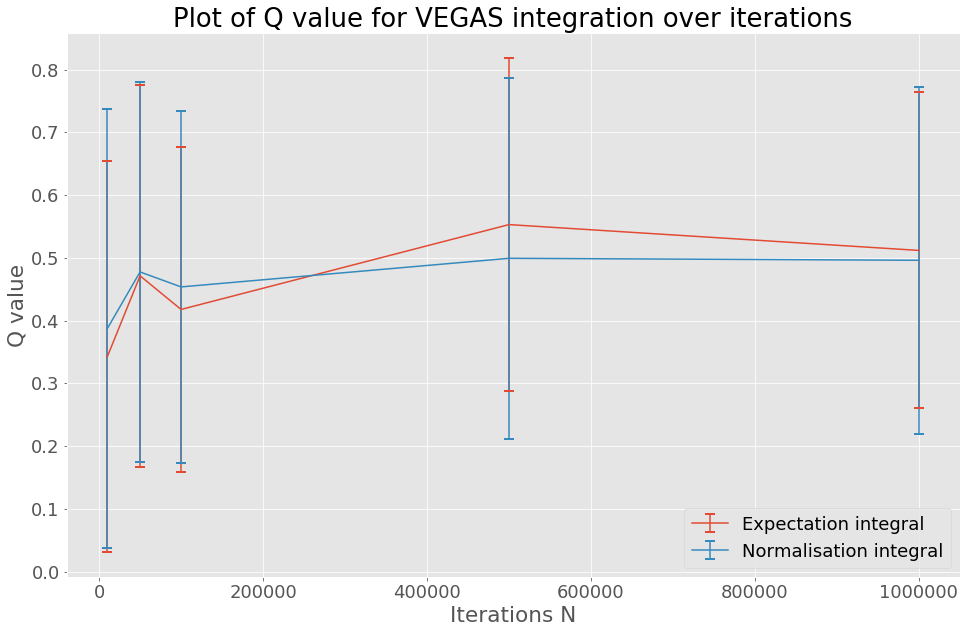

In [24]:
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(16,10))

plt.errorbar(iters, qexp, yerr = qestd, mew=mew, capsize=cs, label='Expectation integral')
plt.errorbar(iters, qnorm, yerr = qnstd, mew=mew, capsize=cs, label='Normalisation integral')
plt.ylabel('Q value')
plt.xlabel('Iterations n')
plt.legend()
plt.title('Plot of Q value for VEGAS integration over iterations')
plt.show()

### This explores how increasing the bound size impacts the value and variance of the energy
#### This was done for N=1e5, 1para, each averaged over 50 trials
The space being integrated over is [-bound,bound] in all 6 dimensions.

We can see a decreasing trend which plateaus quickly, as we integrate over more space. Also note that our program did not allow choosing a smaller bound. We predict that it is due to catastrophic cancellation of the expectation and normalisation integral which our computers cannot handle.

However, the variance increases as the bound increases, as there are less iterations per space.

In [21]:
#import and unpack data
bounds, benergy, balpha, bestd, bastd = np.loadtxt('vegas_bound_comp.csv', delimiter=',', skiprows=1, unpack=1)

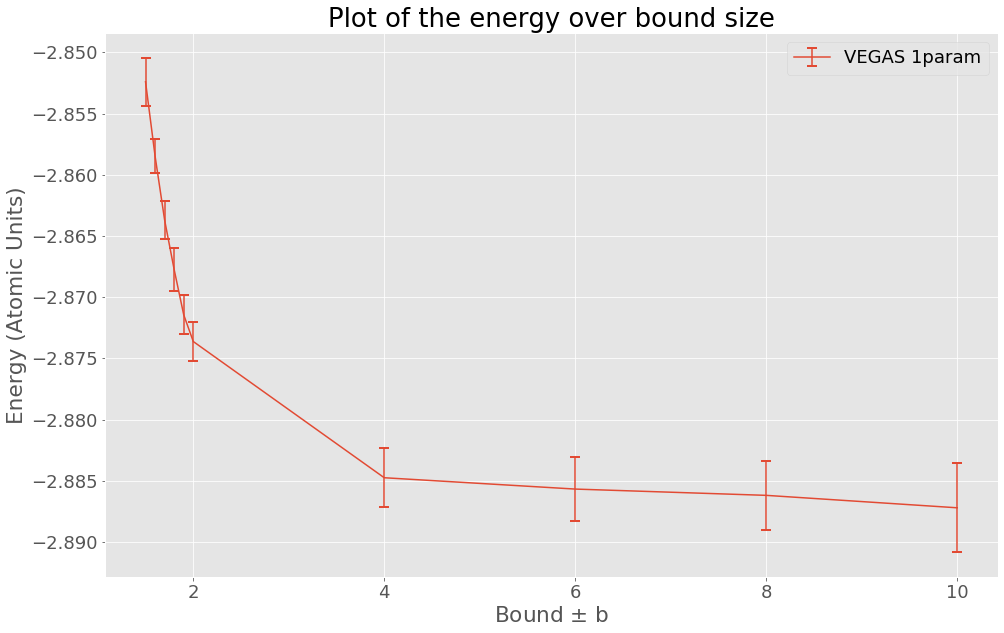

In [31]:
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(16,10))

mew = 2
cs = 5
plt.xlabel('Bound $\pm$ b')
plt.ylabel('Energy (Atomic Units)')
plt.errorbar(bounds,benergy, yerr = bestd, mew = 2, capsize=cs, label='VEGAS 1param')
plt.legend()

plt.title('Plot of the energy over bound size')
plt.savefig('1param_benergy_comp')
plt.show()

Similar with the plot above, there was not significant trend for the variation in optimal alpha. 

Text(0.5, 1.0, 'Plot of the variational parameter over number of iterations')

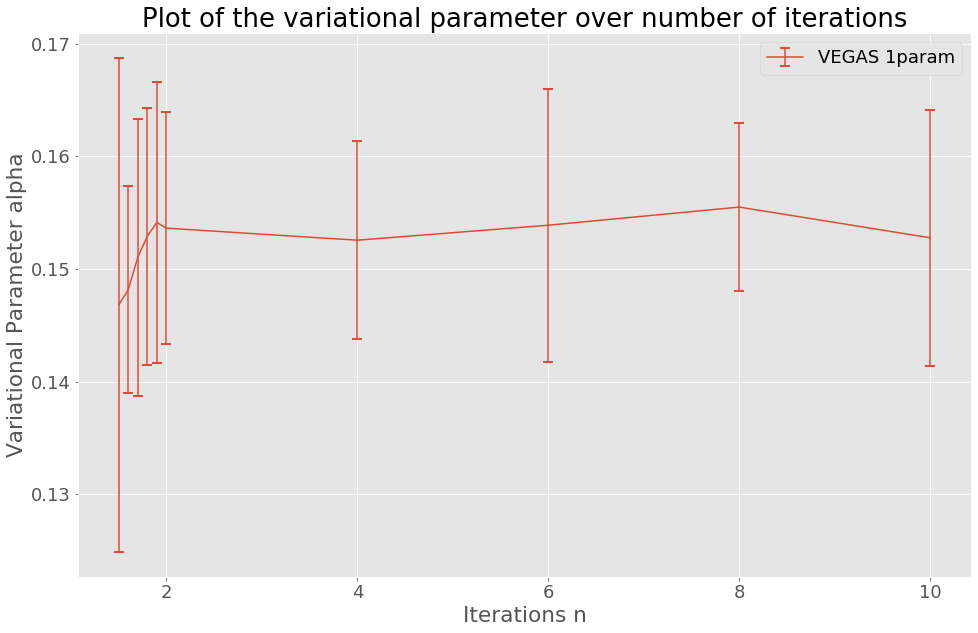

In [29]:
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(16,10))

mew = 2
cs = 5
plt.xlabel('Iterations n')
plt.ylabel('Variational Parameter alpha')
plt.errorbar(bounds, balpha, yerr = bastd, mew =mew, capsize=cs, label='VEGAS 1param')
plt.legend()

plt.title('Plot of the variational parameter over number of iterations')
#plt.savefig('1param_alpha_comp')
plt.show()